<a href="https://colab.research.google.com/github/AYUSHUMARE259/Approx-Computing-/blob/main/approx_computing_design_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####### compressor ###########
def n(a):
  return 1-a

def approx_compressor_2(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    C= n((n(A&B))|(n(C&D)))
    S = ((n(A^B))|(n(C^D)))
    return C,S

def digit_to_binary(A):
    A=bin(A)[2:]
    A=A.zfill(8)
    return A

A=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
print(f"{'X4':>2} {'X3':>2} {'X2':>2} {'X1':>2} | {'C′':>2} {'S′':>2}")
print("-" * 2)
for i in A:
  p=digit_to_binary(i)
  last4 = p[-4:]
  a1=int(last4[3])
  a2=int(last4[2])
  a3=int(last4[1])
  a4=int(last4[0])

  c,s=approx_compressor_2(a1,a2,a3,a4)
  print(f"{a1:>2} {a2:>2} {a3:>2} {a4:>2} |{c:>2} {s:>2}")



X4 X3 X2 X1 | C′ S′
--
 0  0  0  0 | 0  1
 1  0  0  0 | 0  1
 0  1  0  0 | 0  1
 1  1  0  0 | 0  1
 0  0  1  0 | 0  1
 1  0  1  0 | 0  1
 0  1  1  0 | 0  1
 1  1  1  0 | 0  1
 0  0  0  1 | 0  1
 1  0  0  1 | 0  0
 0  1  0  1 | 0  0
 1  1  0  1 | 0  1
 0  0  1  1 | 0  1
 1  0  1  1 | 0  0
 0  1  1  1 | 0  0
 1  1  1  1 | 1  1


In [ ]:
def n(a):
  return 1-a
def half_adder(A, B):
    A=int(A)
    B=int(B)
    sum_bit = A ^ B  # XOR operation
    carry = A & B    # AND operation
    return [sum_bit, carry]

def full_adder(A,B,C):
    A=int(A)
    B=int(B)
    sum = A^B^C
    carry = (A&B) | (B&C) | (A&C)
    return [sum,carry]
def approx_compressor_2(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    C= n((n(A|B)) | (n(D|C)))
    S = (n(A^B)) | (n(C^D))
    return [S,c]
def print_matrix(L):
    for row in L:
        print(" ".join(str(x) for x in row))
def digit_to_binary(A):
    A=bin(A)[2:]
    A=A.zfill(8)
    return A

def multiplier_using_design_2(A,B):
  A=digit_to_binary(A)
  B=digit_to_binary(B)
  p=[]
  N=len(A)
  M=len(B)
  for i in range(M):
      row = []
      for j in range(N):
          r=int(A[j])
          q=int(B[M-1-i])
          row.append(r&q)
      row = ['*']*(7-i)+row+['*']*i
      p.append(row)
  print_matrix(p)
  #p is now of 15x8 matrix
  #stage 1 & 2
  sum_bit=[0]*15
  carry_bit=[0]*15
  #column 14
  sum_bit[14]=p[0][14]
  carry_bit[14]=0
  #column 13
  sum_bit[13]=p[0][13]
  carry_bit[13]=p[1][13]
  #column 12
  sum_bit[12]=half_adder(p[0][12],p[1][12])[0]
  carry_bit[12]=p[2][12]
  #column 11
  sum_bit[11]=approx_compressor_2(p[0][11],p[1][11],p[2][11],p[3][11])[0]
  carry_bit[11]=half_adder(p[0][12],p[1][12])[1]
  #column 10
  xx=(half_adder(p[0][10],p[1][10])[0])
  sum_bit[10]=approx_compressor_2(xx,p[2][10],p[3][10],p[4][10])[0]
  carry_bit[10]=approx_compressor_2(p[0][11],p[1][11],p[2][11],p[3][11])[1]
  #column 9
  s1=approx_compressor_2(p[0][9],p[1][9],p[2][9],p[3][9])[0]
  c1=approx_compressor_2(p[0][9],p[1][9],p[2][9],p[3][9])[1]
  c0=half_adder(p[0][10],p[1][10])[1]
  sum_bit[9]=approx_compressor_2(s1,c0,p[4][9],p[5][9])[0]
  carry_bit[9]=approx_compressor_2(half_adder(p[0][10],p[1][10])[0],p[2][10],p[3][10],p[4][10])[1]
  #column 8
  s2=approx_compressor_2(p[0][8],p[1][8],p[2][8],p[3][8])[0]
  c2=approx_compressor_2(p[0][8],p[1][8],p[2][8],p[3][8])[1]
  s3=half_adder(p[4][8],p[5][8])[0]
  c3=half_adder(p[4][8],p[5][8])[1]
  sum_bit[8]=approx_compressor_2(s2,c1,s3,p[6][8])[0]
  carry_bit[8]=approx_compressor_2(s1,c0,p[4][9],p[5][9])[1]
  #column 7
  s4=approx_compressor_2(p[0][7],p[1][7],p[2][7],p[3][7])[0]
  c4=approx_compressor_2(p[0][7],p[1][7],p[2][7],p[3][7])[1]
  s5=approx_compressor_2(p[4][7],p[5][7],p[6][7],p[7][7])[0]
  c5=approx_compressor_2(p[4][7],p[5][7],p[6][7],p[7][7])[1]
  sum_bit[7]=approx_compressor_2(s4,c2,s5,c3)[0]
  carry_bit[7]=approx_compressor_2(s2,c1,s3,p[6][8])[1]
  #column 6
  ss5=approx_compressor_2(p[1][6],p[2][6],p[3][6],p[4][6])[0]
  cc5=approx_compressor_2(p[1][6],p[2][6],p[3][6],p[4][6])[1]
  s6=full_adder(p[5][7],p[6][7],p[7][6])[0]
  c6=full_adder(p[5][7],p[6][7],p[7][6])[1]
  sum_bit[6]=approx_compressor_2(ss5,c4,s6,c5)[0]
  carry_bit[6]=approx_compressor_2(s4,c2,s5,c3)[1]
  #column 5
  s7=approx_compressor_2(p[2][5],p[3][5],p[4][5],p[5][5])[0]
  c7=approx_compressor_2(p[2][5],p[3][5],p[4][5],p[5][5])[1]
  s8=half_adder(p[6][5],p[7][5])[0]
  c8=half_adder(p[6][5],p[7][5])[1]
  sum_bit[5]=approx_compressor_2(s7,cc5,s8,c6)[0]
  carry_bit[5]=approx_compressor_2(ss5,c4,s6,c5)[1]
  #column 4
  s9=approx_compressor_2(p[3][4],p[4][4],p[5][4],p[6][4])[0]
  c9=approx_compressor_2(p[3][4],p[4][4],p[5][4],p[6][4])[1]
  sum_bit[4]=approx_compressor_2(s9,c7,p[7][4],c8)[0]
  carry_bit[4]=approx_compressor_2(s7,cc5,s8,c6)[1]
  #column 3
  s10=half_adder(p[4][3],p[5][3])[0]
  c10=half_adder(p[4][5],p[5][3])[1]
  sum_bit[3]=approx_compressor_2(s10,c9,p[6][3],p[7][3])[0]
  carry_bit[3]=approx_compressor_2(s9,c7,p[7][4],c8)[1]
  #column 2
  sum_bit[2]=approx_compressor_2(p[5][2],c10,p[6][2],p[7][2])[0]
  carry_bit[2]=approx_compressor_2(s10,c9,p[6][3],p[7][3])[1]
  #column 1
  sum_bit[1]=half_adder(p[6][1],p[7][1])[0]
  carry_bit[1]=approx_compressor_2(p[5][2],c10,p[6][2],p[7][2])[1]
  #column 0
  sum_bit[0]=p[7][0]
  carry_bit[0]=half_adder(p[6][1],p[7][1])[1]
  result = [0] * 16
  sum14, carry = half_adder(sum_bit[14], carry_bit[14])
  result[15] = sum14
  for i in range(13, -1, -1):
      result[i + 1], carry = full_adder(sum_bit[i], carry_bit[i], carry)
  result[0] = carry
  print(sum_bit)
  print(carry_bit)
  return result



print(multiplier_using_design_2(170,170))

* * * * * * * 0 0 0 0 0 0 0 0
* * * * * * 1 0 1 0 1 0 1 0 *
* * * * * 0 0 0 0 0 0 0 0 * *
* * * * 1 0 1 0 1 0 1 0 * * *
* * * 0 0 0 0 0 0 0 0 * * * *
* * 1 0 1 0 1 0 1 0 * * * * *
* 0 0 0 0 0 0 0 0 * * * * * *
1 0 1 0 1 0 1 0 * * * * * * *
[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]


In [ ]:
def n(a):
    return 1 - a

def half_adder(A, B):
    A = int(A)
    B = int(B)
    sum_bit = A ^ B
    carry = A & B
    return [sum_bit, carry]

def full_adder(A, B, C):
    A = int(A)
    B = int(B)
    sum = A ^ B ^ C
    carry = (A & B) | (B & C) | (A & C)
    return [sum, carry]

def approx_compressor_D2(A, B, C, D):
    A = int(A)
    B = int(B)
    C = int(C)
    D = int(D)
    sum_2 = ((~(A^B))|(~(C^D)))&1
    carry = ~((~(A&B))|(~(C&D)))&1
    return [sum_2, carry]

def digit_to_binary_1(A):
    A = int(A)
    if A >= 0:
        A = bin(A)[2:]
    return A.zfill(8)

def multiplier_1_demo(A, B):
    unsign_a=abs(A)
    unsign_b=abs(B)
    A_bin = digit_to_binary_1(unsign_a)
    B_bin = digit_to_binary_1(unsign_b)
    N = len(A_bin)
    M = len(B_bin)
    p = []
    sign = -1 if (B < 0) ^ (A < 0) else 1
    for i in range(M):
        row = []
        for j in range(N):
            r = int(A_bin[j])
            q = int(B_bin[M - 1 - i])
            row.append(r & q)
        row = [0] * (7 - i) + row + [0] * i
        p.append(row)

    sum_bit = [0] * 15
    carry_bit = [0] * 15

    sum_bit[14] = p[0][14]
    carry_bit[14] = 0

    sum_bit[13] = p[0][13]
    carry_bit[13] = p[1][13]

    sum_bit[12] = half_adder(p[0][12], p[1][12])[0]
    carry_bit[12] = p[2][12]

    sum_bit[11] = approx_compressor_D2(p[0][11], p[1][11], p[2][11], p[3][11])[0]
    carry_bit[11] = half_adder(p[0][12], p[1][12])[1]

    xx = half_adder(p[0][10], p[1][10])[0]
    sum_bit[10] = approx_compressor_D2(xx, p[2][10], p[3][10], p[4][10])[0]
    carry_bit[10] = approx_compressor_D2(p[0][11], p[1][11], p[2][11], p[3][11])[1]

    s1 = approx_compressor_D2(p[0][9], p[1][9], p[2][9], p[3][9])[0]
    c1 = approx_compressor_D2(p[0][9], p[1][9], p[2][9], p[3][9])[1]
    c0 = half_adder(p[0][10], p[1][10])[1]
    sum_bit[9] = approx_compressor_D2(s1, c0, p[4][9], p[5][9])[0]
    carry_bit[9] = approx_compressor_D2(xx, p[2][10], p[3][10], p[4][10])[1]

    s2 = approx_compressor_D2(p[0][8], p[1][8], p[2][8], p[3][8])[0]
    c2 = approx_compressor_D2(p[0][8], p[1][8], p[2][8], p[3][8])[1]
    s3 = half_adder(p[4][8], p[5][8])[0]
    c3 = half_adder(p[4][8], p[5][8])[1]
    sum_bit[8] = approx_compressor_D2(s2, c1, s3, p[6][8])[0]
    carry_bit[8] = approx_compressor_D2(s1, c0, p[4][9], p[5][9])[1]

    s4 = approx_compressor_D2(p[0][7], p[1][7], p[2][7], p[3][7])[0]
    c4 = approx_compressor_D2(p[0][7], p[1][7], p[2][7], p[3][7])[1]
    s5 = approx_compressor_D2(p[4][7], p[5][7], p[6][7], p[7][7])[0]
    c5 = approx_compressor_D2(p[4][7], p[5][7], p[6][7], p[7][7])[1]
    sum_bit[7] = approx_compressor_D2(s4, c2, s5, c3)[0]
    carry_bit[7] = approx_compressor_D2(s2, c1, s3, p[6][8])[1]

    ss5 = approx_compressor_D2(p[1][6], p[2][6], p[3][6], p[4][6])[0]
    cc5 = approx_compressor_D2(p[1][6], p[2][6], p[3][6], p[4][6])[1]
    s6 = full_adder(p[5][7], p[6][7], p[7][6])[0]
    c6 = full_adder(p[5][7], p[6][7], p[7][6])[1]
    sum_bit[6] = approx_compressor_D2(ss5, c4, s6, c5)[0]
    carry_bit[6] = approx_compressor_D2(s4, c2, s5, c3)[1]

    s7 = approx_compressor_D2(p[2][5], p[3][5], p[4][5], p[5][5])[0]
    c7 = approx_compressor_D2(p[2][5], p[3][5], p[4][5], p[5][5])[1]
    s8 = half_adder(p[6][5], p[7][5])[0]
    c8 = half_adder(p[6][5], p[7][5])[1]
    sum_bit[5] = approx_compressor_D2(s7, cc5, s8, c6)[0]
    carry_bit[5] = approx_compressor_D2(ss5, c4, s6, c5)[1]

    s9 = approx_compressor_D2(p[3][4], p[4][4], p[5][4], p[6][4])[0]
    c9 = approx_compressor_D2(p[3][4], p[4][4], p[5][4], p[6][4])[1]
    sum_bit[4] = approx_compressor_D2(s9, c7, p[7][4], c8)[0]
    carry_bit[4] = approx_compressor_D2(s7, cc5, s8, c6)[1]

    s10 = half_adder(p[4][3], p[5][3])[0]
    c10 = half_adder(p[4][5], p[5][3])[1]
    sum_bit[3] = approx_compressor_D2(s10, c9, p[6][3], p[7][3])[0]
    carry_bit[3] = approx_compressor_D2(s9, c7, p[7][4], c8)[1]

    sum_bit[2] = approx_compressor_D2(p[5][2], c10, p[6][2], p[7][2])[0]
    carry_bit[2] = approx_compressor_D2(s10, c9, p[6][3], p[7][3])[1]

    sum_bit[1] = half_adder(p[6][1], p[7][1])[0]
    carry_bit[1] = approx_compressor_D2(p[5][2], c10, p[6][2], p[7][2])[1]

    sum_bit[0] = p[7][0]
    carry_bit[0] = half_adder(p[6][1], p[7][1])[1]

    result = [0] * 16
    sum14, carry = half_adder(sum_bit[14], carry_bit[14])
    result[15] = sum14
    for i in range(13, -1, -1):
        result[i + 1], carry = full_adder(sum_bit[i], carry_bit[i], carry)
    result[0] = carry

    product_str = ''.join(map(str, result))
    return sign*int(product_str, 2)

# Test with values in 0 to 256 range
print(multiplier_1_demo(150, 200))


32632


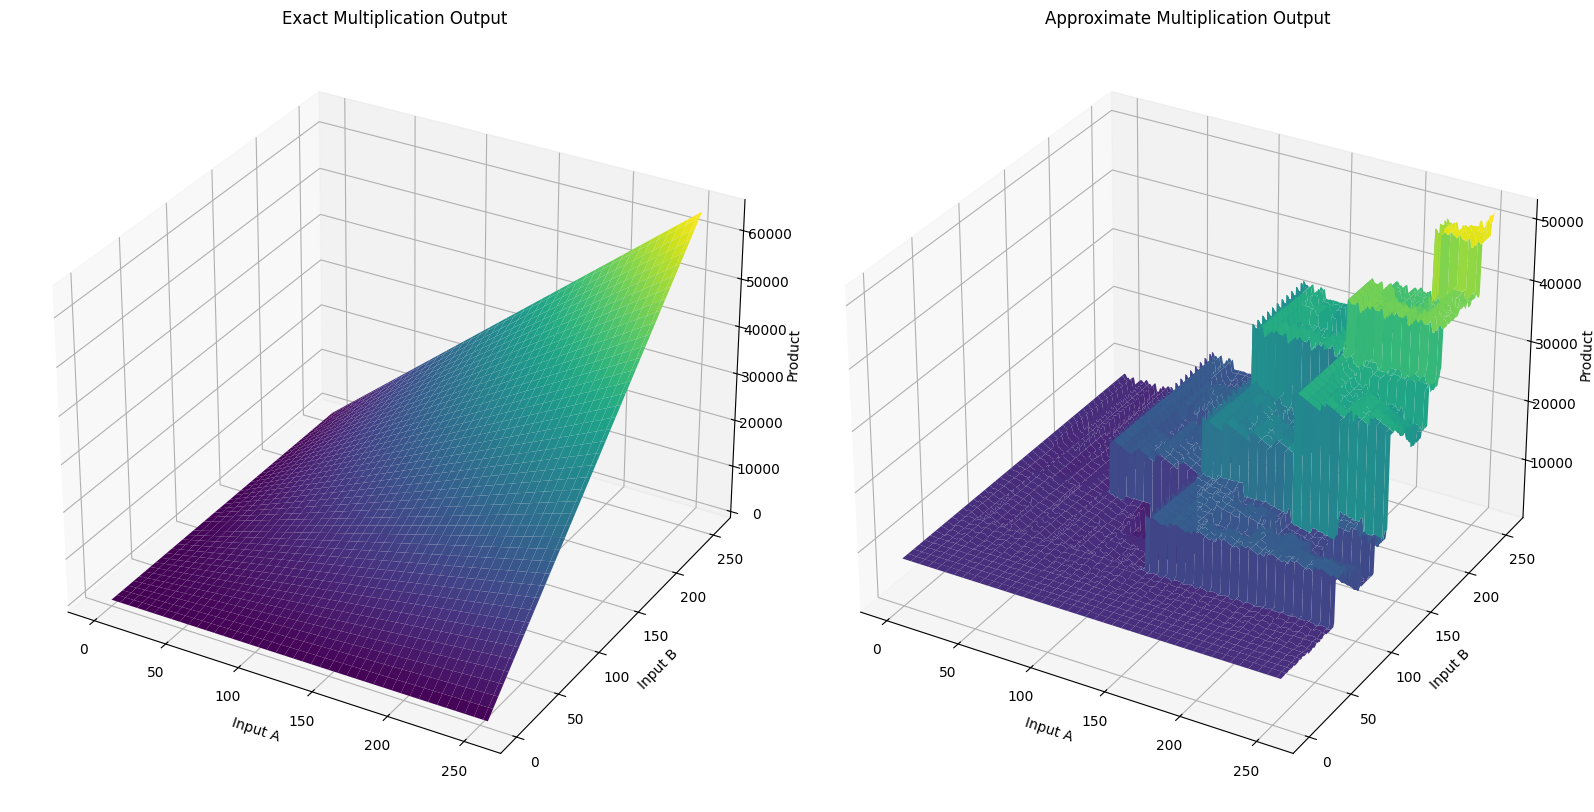

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define range
X = np.arange(0, 256)
Y = np.arange(0, 256)
X, Y = np.meshgrid(X, Y)

# Vectorize the functions for performance
def exact_mult(x, y):
    return x * y

def approx_mult(x, y):
    return multiplier_1_demo(x, y)

# Vectorized evaluation of the exact and approximate multipliers
Z_exact = np.vectorize(exact_mult)(X, Y)
Z_approx = np.vectorize(approx_mult)(X, Y)

# Plotting
fig = plt.figure(figsize=(16, 8))

# Exact Multiplier Plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z_exact, cmap='viridis')
ax1.set_title('Exact Multiplication Output')
ax1.set_xlabel('Input A')
ax1.set_ylabel('Input B')
ax1.set_zlabel('Product')

# Approximate Multiplier Plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z_approx, cmap='viridis')
ax2.set_title('Approximate Multiplication Output')
ax2.set_xlabel('Input A')
ax2.set_ylabel('Input B')
ax2.set_zlabel('Product')

plt.tight_layout()
plt.show()

Saving Original-image-256x256_Q320.jpg to Original-image-256x256_Q320 (2).jpg


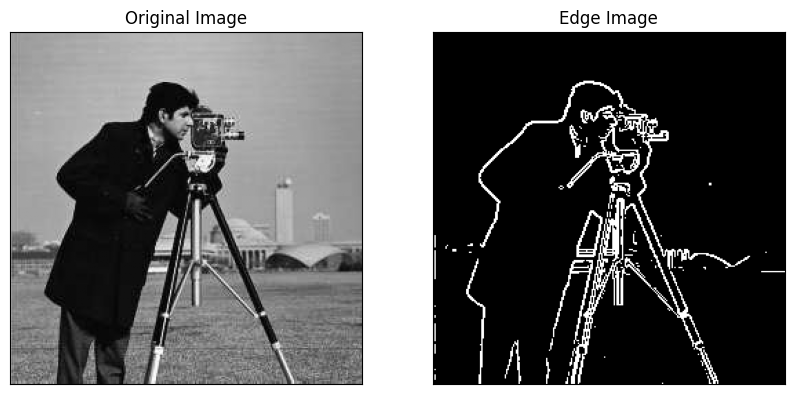

In [ ]:
#edge detection inbuilt
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imdecode(np.frombuffer(next(iter(files.upload().values())), np.uint8), cv2.IMREAD_GRAYSCALE)

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_magnitude1 = np.hypot(sobelx, sobely)
sobel_magnitude2 = cv2.normalize(sobel_magnitude1, None, 0, 255, cv2.NORM_MINMAX)

edge_inbuilt = np.where(sobel_magnitude2 < 80, 0, 255).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edge_inbuilt,cmap = 'gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])
plt.show()


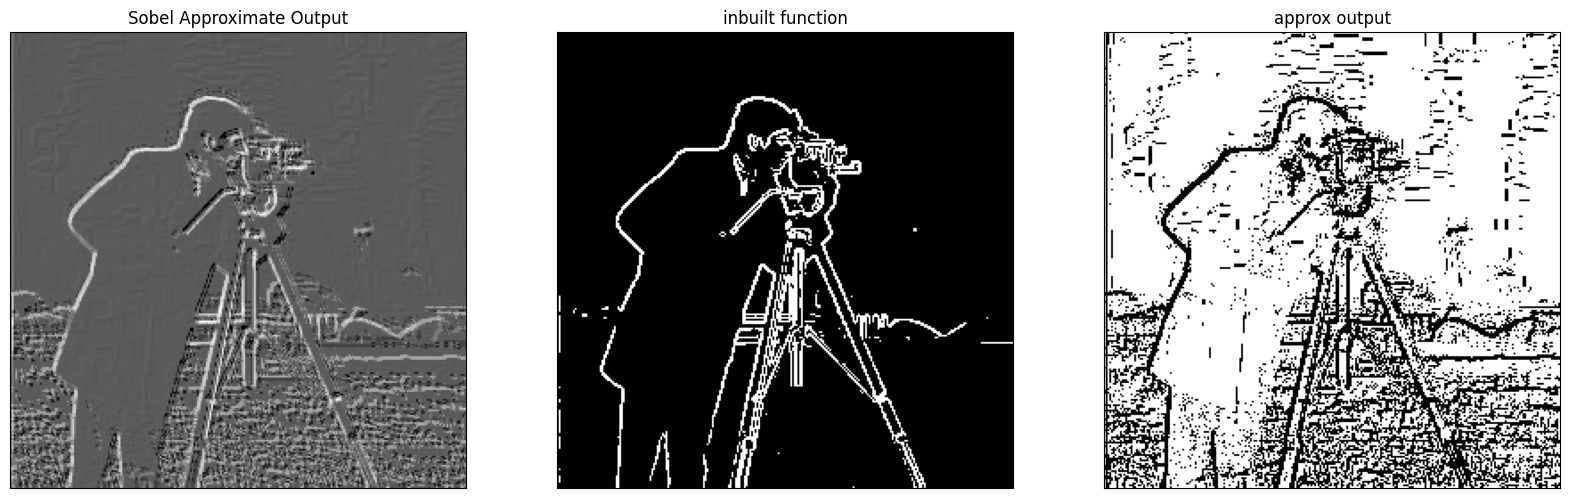

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

sobel_x_kernel = np.array([[1.5,0,1.5],[2,0,2],[1.5,0,1.5]])*128
sobel_y_kernel = np.array([[1.5,2,1.5],[0,0,0],[1.5,2,1.5]])*128

img_1 = cv2.imread("/content/Original-image-256x256_Q320.jpg", cv2.IMREAD_GRAYSCALE)
def convolution_x(img,kernel,multiplier):

  img_height, img_width = img.shape
  kernel_height, kernel_width = kernel.shape
  pad = kernel_height//2
  padded_img = cv2.copyMakeBorder( #padding the image for the specific kernel
    img,
    top=pad, bottom=pad,
    left=pad, right=pad,
    borderType=cv2.BORDER_DEFAULT )
  output = np.zeros(img.shape,dtype=np.float32)
  for i in range(img_height):
    for j in range(img_width):
      matrix = padded_img[i:i+kernel_height,j:j+kernel_width]
      temp = np.zeros(kernel.shape)
      for k in range(kernel_height):
        for l in range(kernel_width):
          if(l==2):#accounting for the negative values in the kernel
            temp[k,l] = -1*(multiplier(matrix[k,l],kernel[k,l]))
          else:
            temp[k,l] = multiplier(matrix[k,l],kernel[k,l])
      output[i,j] = np.sum(temp)/128
  return output

def convolution_y(img,kernel,multiplier):

  img_height, img_width = img.shape
  kernel_height, kernel_width = kernel.shape
  pad = kernel_height//2
  padded_img = cv2.copyMakeBorder( #padding the image for the specific kernel
    img,
    top=pad, bottom=pad,
    left=pad, right=pad,
    borderType=cv2.BORDER_DEFAULT )
  output = np.zeros(img.shape,dtype=np.float32)
  for i in range(img_height):
    for j in range(img_width):
      matrix = padded_img[i:i+kernel_height,j:j+kernel_width]
      temp = np.zeros(kernel.shape)
      for k in range(kernel_height):
        for l in range(kernel_width):
          if(k==2):#accounting for the negative values in the kernel
            temp[k,l] = -1*(multiplier(matrix[k,l],kernel[k,l]))
          else:
            temp[k,l] = multiplier(matrix[k,l],kernel[k,l])
      output[i,j] = np.sum(temp)/128
  return output


gx = convolution_x(img_1,sobel_x_kernel,multiplier_1_demo)
gy = convolution_y(img_1,sobel_y_kernel,multiplier_1_demo)
image1 = np.hypot(gx,gy)
image2 = cv2.normalize(image1, None, 0, 255, cv2.NORM_MINMAX)
image3 = np.where(image2 > 95, 0, 255).astype(np.uint8)#changing the value of the threshold can varry the results
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(image1,cmap = 'gray')
plt.title('Sobel Approximate Output')
plt.xticks([])
plt.yticks([])
plt.subplot(132),plt.imshow(edge_inbuilt,cmap = 'gray')
plt.title('inbuilt function')
plt.xticks([])
plt.yticks([])
plt.subplot(133),plt.imshow(image3,cmap = 'gray')
plt.title('approx output')
plt.xticks([])
plt.yticks([])
plt.show()

([], [])

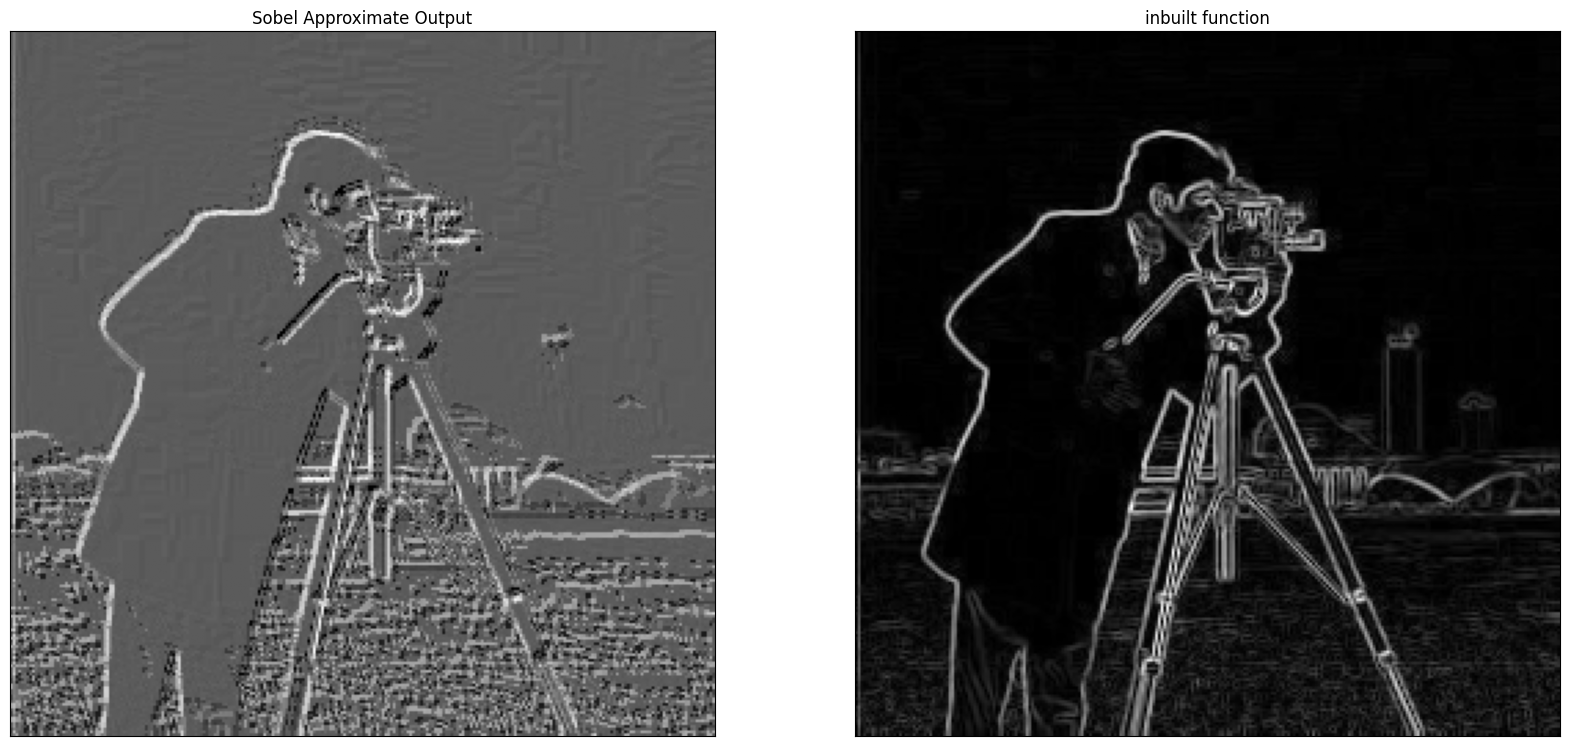

In [ ]:
#magnitude image comparison

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(image2,cmap = 'gray')
plt.title('Sobel Approximate Output')
plt.xticks([])
plt.yticks([])
plt.subplot(122),plt.imshow(sobel_magnitude2,cmap = 'gray')
plt.title('inbuilt function')
plt.xticks([])
plt.yticks([])

In [ ]:
#psnr and ssim
import math
from skimage.metrics import structural_similarity as ssim
def psnr_ssim(img1, img2):
    mse = np.mean((img1.astype(np.float64) - img2.astype(np.float64)) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * math.log10(max_pixel / math.sqrt(mse))
    valu=ssim(img1,img2, data_range=255)
    return psnr_value,(valu)
psnr_ssim(sobel_magnitude2,image2)


(9.579248320370304, np.float64(0.10295857308699324))

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Upload multiple images
uploaded = files.upload()
# Store all PSNR and SSIM values
psnr_list = []
ssim_list = []
# Process each image
for fn in uploaded.keys():
    # Read image in grayscale
    img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_GRAYSCALE)

    # Custom edge detection
    edge_custom = sobel_edge_detection(img)

    # Standard Sobel edge detection
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_mag = np.sqrt(sobelx**2 + sobely**2)
    sobel_mag = np.clip((sobel_mag / sobel_mag.max()) * 255, 0, 255).astype(np.uint8)

    # Binarize Sobel result to match custom output style
    _, sobel_binary = cv2.threshold(sobel_mag, 100, 255, cv2.THRESH_BINARY_INV)

    # Compute metrics
    psnr_ssim(edge_custom, sobel_binary)
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Upload multiple images
uploaded = files.upload()
# Store all PSNR and SSIM values
psnr_list = []
ssim_list = []
# Process each image
for fn in uploaded.keys():
    # Read image in grayscale
    img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), cv2.IMREAD_GRAYSCALE)

    # Custom edge detection
    edge_custom = sobel_edge_detection(img)

    # Standard Sobel edge detection
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_mag = np.sqrt(sobelx**2 + sobely**2)
    sobel_mag = np.clip((sobel_mag / sobel_mag.max()) * 255, 0, 255).astype(np.uint8)

    # Binarize Sobel result to match custom output style
    _, sobel_binary = cv2.threshold(sobel_mag, 100, 255, cv2.THRESH_BINARY_INV)

    # Compute metrics
    psnr_val, ssim_val = psnr_ssim(edge_custom, sobel_binary)
    # Show output for each image
    print(f"PSNR: {psnr_val:.2f} dB, SSIM: {ssim_val:.4f}")
    psnr_list.append(psnr_val)
    ssim_list.append(ssim_val)
# Compute mean PSNR and SSIM
mean_psnr = np.mean(psnr_list)
mean_ssim = np.mean(ssim_list)

print("\n--- Summary Across All Images ---")
print(f"Mean PSNR: {mean_psnr:.2f} dB")
print(f"Mean SSIM: {mean_ssim:.4f}")
# Compute mean PSNR and SSIM
mean_psnr = np.mean(psnr_list)
mean_ssim = np.mean(ssim_list)

print("\n--- Summary Across All Images ---")
print(f"Mean PSNR: {mean_psnr:.2f} dB")
print(f"Mean SSIM: {mean_ssim:.4f}")


Saving a-birdbmp-256x256-b-Quantized-image-c-Reconstructed-image.png to a-birdbmp-256x256-b-Quantized-image-c-Reconstructed-image (6).png
Saving bit-256-x-256-Grayscale-Lena-Image.png to bit-256-x-256-Grayscale-Lena-Image (14).png
Saving images.jpg to images (6).jpg
Saving Original-image-256x256_Q320.jpg to Original-image-256x256_Q320 (6).jpg
Saving woman_blonde.tif to woman_blonde (7).tif
Saving woman_darkhair.tif to woman_darkhair (7).tif


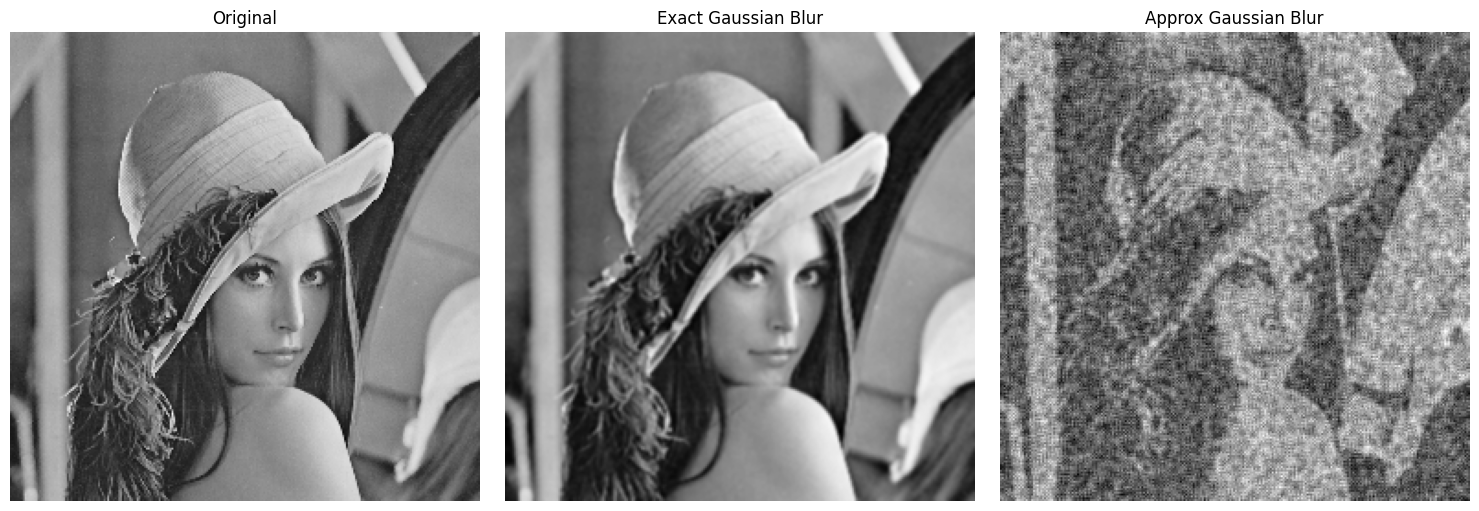

In [ ]:
#guassian blur
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Read image
img = Image.open("/content/bit-256-x-256-Grayscale-Lena-Image.png").convert("L")
img_np = np.array(img)

# Gaussian kernel (sum = 16)
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.int32)

def gaussian_blur_convolution(img, kernel):
    height, width = img.shape
    k_height, k_width = kernel.shape
    pad = k_height // 2

    kernel_sum = np.sum(kernel)

    # Use float for safety
    img = img.astype(np.float32)

    # Manual edge-padding (replicate)
    padded_img = np.zeros((height + 2*pad, width + 2*pad), dtype=np.float32)
    padded_img[pad:-pad, pad:-pad] = img                         # center
    padded_img[:pad, pad:-pad] = img[0:1, :]                     # top
    padded_img[-pad:, pad:-pad] = img[-1:, :]                    # bottom
    padded_img[:, :pad] = padded_img[:, pad:pad+1]               # left
    padded_img[:, -pad:] = padded_img[:, -pad-1:-pad]            # right

    # Output images
    exact_out = np.zeros_like(img, dtype=np.float32)
    approx_out = np.zeros_like(img, dtype=np.float32)

    # Convolution Loop
    for y in range(height):
        for x in range(width):
            patch = padded_img[y:y+k_height, x:x+k_width]
            exact_sum = np.sum(patch * kernel)
            approx_sum = 0.0
            for ky in range(k_height):
                for kx in range(k_width):
                    approx_sum += multiplier_1_demo(patch[ky, kx], kernel[ky, kx])
            exact_out[y, x] = exact_sum / kernel_sum
            approx_out[y, x] = approx_sum / kernel_sum

    # Clip to 0–255 and convert

    exact_out = np.clip(exact_out, 0, 255).astype(np.uint8)

    image2 = cv2.normalize(approx_out, None, 0, 255, cv2.NORM_MINMAX)
    approx_out1 = np.clip(image2, 0, 255).astype(np.uint8)

    return exact_out, approx_out1

# Run the blur
exact_blur, approx_blur = gaussian_blur_convolution(img_np, gaussian_kernel)

# Display Results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img_np, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Exact Gaussian Blur")
plt.imshow(exact_blur, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Approx Gaussian Blur")
plt.imshow(approx_blur, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
